In [1]:
#Upoading Dataset in Colab
from google.colab import files
uploaded = files.upload()

Saving netflix_titles_nov_2019.csv to netflix_titles_nov_2019.csv


In [0]:
import pandas as pd
data = pd.read_csv('netflix_titles_nov_2019.csv')

In [10]:
data.shape

(1210, 12)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1210 non-null   int64 
 1   title         1210 non-null   object
 2   director      922 non-null    object
 3   cast          1092 non-null   object
 4   country       1084 non-null   object
 5   date_added    1205 non-null   object
 6   release_year  1210 non-null   int64 
 7   rating        1209 non-null   object
 8   duration      1210 non-null   object
 9   listed_in     1210 non-null   object
 10  description   1210 non-null   object
 11  type          1210 non-null   object
dtypes: int64(2), object(10)
memory usage: 113.6+ KB


In [12]:
data.isnull().sum()

show_id           0
title             0
director        288
cast            118
country         126
date_added        5
release_year      0
rating            1
duration          0
listed_in         0
description       0
type              0
dtype: int64

In [13]:
data.head(3)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,70140438,Skins,NaN,"Kaya Scodelario, Hannah Murray, Jack O'Connell...",United Kingdom,"August 2, 2017",2013,TV-MA,7 Seasons,"British TV Shows, International TV Shows, TV D...",This incisive series centers on the tense live...,TV Show
1,70143836,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,TV Show
2,80144146,The Investigator: A British Crime Story,NaN,"Mark Williams-Thomas, Rick Warden, Frances Mil...",United Kingdom,"August 19, 2018",2018,TV-14,2 Seasons,"British TV Shows, Crime TV Shows, Docuseries",This show sheds new light on the decades-old c...,TV Show


In [0]:
#Changing Format of Date 
data["date_added"] = pd.to_datetime(data['date_added'])

In [15]:
data.head(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,70140438,Skins,NaN,"Kaya Scodelario, Hannah Murray, Jack O'Connell...",United Kingdom,2017-08-02,2013,TV-MA,7 Seasons,"British TV Shows, International TV Shows, TV D...",This incisive series centers on the tense live...,TV Show
1,70143836,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,2013-08-02,2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,TV Show


In [16]:
data.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

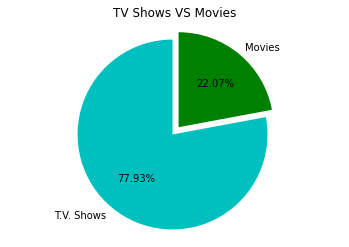

In [17]:
#Pie-Chart Representation of target attribute
import matplotlib.pyplot as plt

labels = 'T.V. Shows', 'Movies'
sections = data.type.value_counts()
colors = ['c', 'g']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('TV Shows VS Movies')
plt.show()

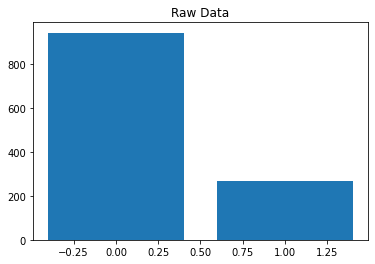

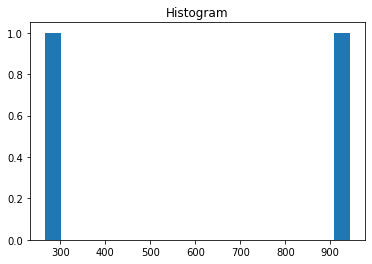

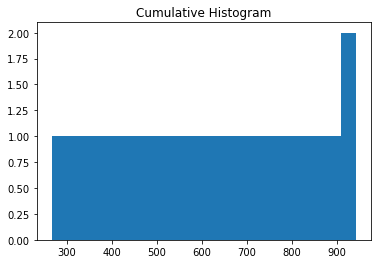

In [18]:
#Different Bar Graph Representation of target attribute
import matplotlib.pyplot as plt

# Use numpy to generate a bunch of random data in a bell curve around 5.
n = data.type.value_counts()

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data")
plt.show()

plt.hist(n, bins=20)
plt.title("Histogram")
plt.show()

plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram")
plt.show()

In [19]:
#Countries with Most Content
import plotly.graph_objects as go

top_countries=data.country.value_counts()

top_countries=top_countries[:15][::-1]

trace=go.Bar(x=top_countries.values,y=top_countries[:15].index,orientation='h',name='',marker=dict(color='#6ad49b'))

data = [trace]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data, layout=layout)
fig.show()

In [3]:
#Countries with Most Content With Respect to Directors
import plotly.graph_objects as go
def country_top_dir(country):
    indian_dir=data.loc[(data.country==str(country)) & (data.type=="Movie")]
    # indian_dir.director.value_counts()[:12]

    col = "director"
    categories = ", ".join(indian_dir[col].fillna("")).split(", ")

    directors=pd.Series(categories)
    directors=directors.value_counts()[1:16]

    trace=go.Bar(x=directors.values[:10][::-1],y=directors.index[:10][::-1],orientation='h',marker=dict(color='#a678de'))
    return trace
from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_top_dir(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



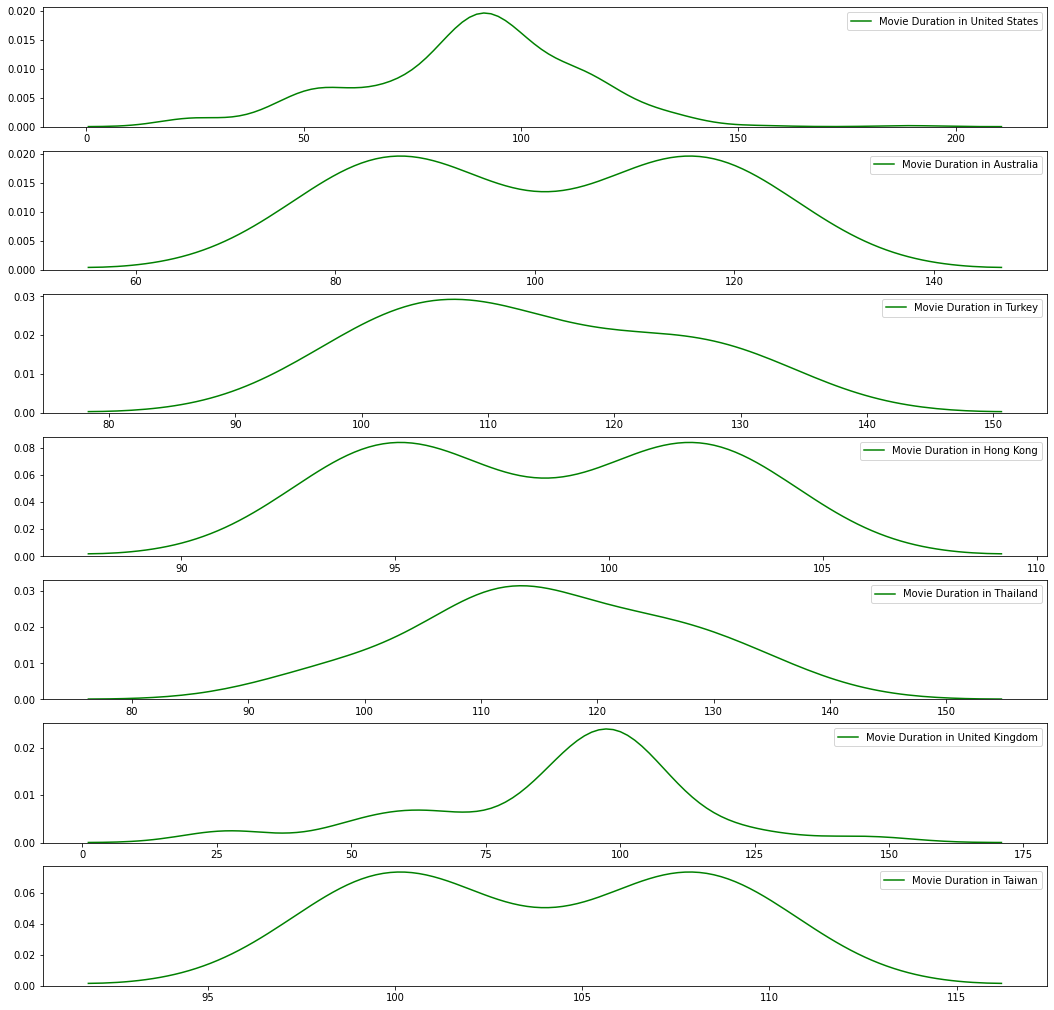

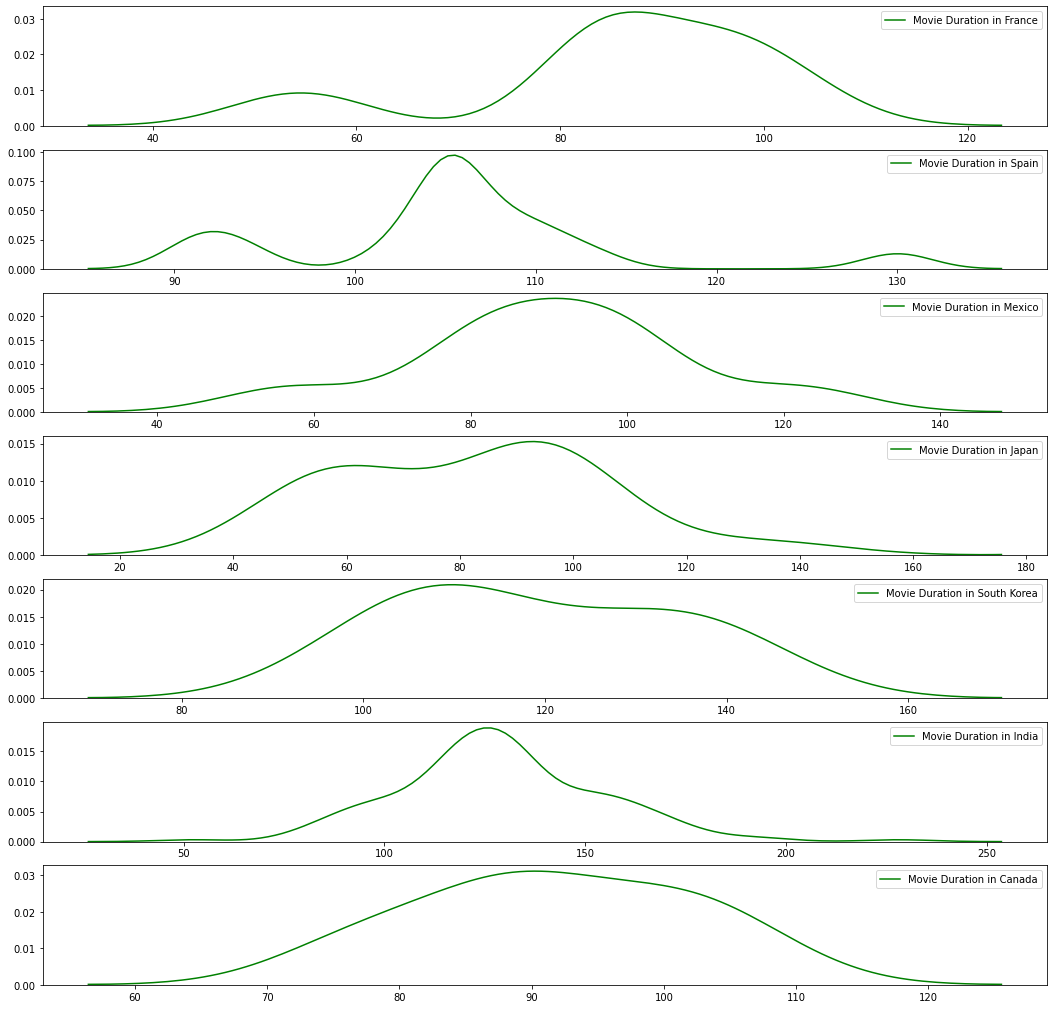

In [4]:
#Different Countries with their Duration Graph 
import seaborn as sns
import matplotlib.pyplot as plt

countries_0_7=['United States','Australia','Turkey','Hong Kong','Thailand',"United Kingdom",'Taiwan']
countrie_7_14=['France','Spain'
          ,'Mexico','Japan','South Korea','India','Canada']
def country_mov_dur(country):
    data_country_dur=data.loc[(data.country==str(country))&(data.type=='Movie')].duration[:]


    # # ' minSeaso' will remove ' Season' and ' min'
    data_country_dur=data_country_dur.apply(lambda x : int(x.strip(' minSeaso')))
    
    return data_country_dur

#     sns.kdeplot(netflix_usa,Label='Movie Duration in USA',color='g')
f, axes = plt.subplots(7,1,figsize=(18,18))
for i in range(7):
    for j in range(1):
        country_mov_duration=country_mov_dur(str(countries_0_7[i]))
        
        sns.kdeplot(country_mov_duration,Label='Movie Duration'+' in '+str(countries_0_7[i]),color='g',ax=axes[i])
        
f, axes = plt.subplots(7,1,figsize=(18,18))
for i in range(7):
    for j in range(1):
        country_mov_duration=country_mov_dur(str(countrie_7_14[i]))
        
        sns.kdeplot(country_mov_duration,Label='Movie Duration'+' in '+str(countrie_7_14[i]),color='g',ax=axes[i])

In [5]:
#Content added over the Years
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
d1 = data[data["type"] == "TV Show"]
d2 = data[data["type"] == "Movie"]

col = "date_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data1 = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
fig.show()

In [7]:
#Content added over the Years with scaled up Duration
col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data1 = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
fig.show()

In [8]:
#Most Content with respect to Month
col = 'date_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
data1 = [trace1]
layout = go.Layout(title="In which month, the conent is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data1, layout=layout)
fig.show()

In [9]:
#Distplot with Normal Distributionn in Release Year
import plotly.figure_factory as ff
x1 = data['release_year'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with Normal Distributionn in Release Year')
fig.show()

In [0]:
#Decision Tree Classifier Building in Scikit-learn
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#split dataset in features and target variable
feature_cols = ['show_id', 'title', 'director', 'cast','country','date_added','release_year','rating','duration','listed_in','description']
X = data[feature_cols] # Features
y = data.type # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

